# Model Project

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True)

# P vs. Q without uncertainty

## Model setup

Consider the optimal provision of an environmental good (Example used in Weitzman (1974) is "clean air", i.e. opposite of pollution) in a standard setting, where the marginal benefit of the good is decreasing in quantity and marginal cost of the good is increasing in quantity, i.e. the model can be expressed as:

* $B(q)$ is societies benefit in producing commodity $q$.
* $B'(q)<0$ is societies marginal benefit in producing commodity $q$.
* $C(q)$ is societies cost in producing commodity $q$.
* $B'(q)>0$ is societies marginal cost in producing commodity $q$.

The planner's problem is then to maximize:
$$ \max_q B(q)-C(q) $$
Which yields the solution
$$ B'(q^*)=C'(q^*)=p^* $$
Where $p^*$ is the optimal price for the environmental good.

Consider a functional form with no uncertainty:
* $B'(q) = a-b \cdot q $
* $C'(q) = c+d \cdot q $

## Graphical analysis

If we specify model parameters, we can solve the model graphically

In [270]:
#_par means parameter
a_par = 30
b_par = 0.5
c_par = 5
d_par = 2

def B_derivative(q):
    return (a_par - b_par * q)

def C_derivative(q):
    return (c_par + d_par * q)

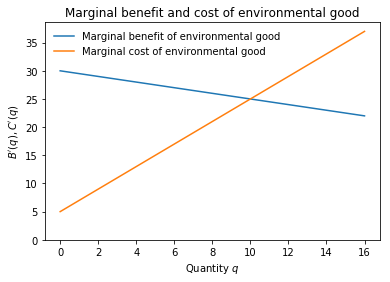

In [271]:
q = np.linspace(0, 16, 1000)
plt.plot(q, B_derivative(q), label = "Marginal benefit of environmental good")
plt.plot(q, C_derivative(q), label = "Marginal cost of environmental good")
plt.title("Marginal benefit and cost of environmental good")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("$B'(q),C'(q)$")
plt.ylim(0)

## Analytical analysis
We can solve it analytically using sympy

In [272]:
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')
d = sm.symbols('d')
q = sm.symbols('q')
p = sm.symbols('p')

#First we set marginal cost and benefit equal
equilibrium = sm.Eq(a-b*q,c+d*q)
equilibrium

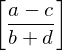

In [273]:
#Solve for q
opt_q = sm.solve(equilibrium,q)
opt_q

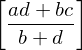

In [287]:
#Solve for P
MC = sm.Eq(c+d*q,p)
MC_subs = MC.subs(q,opt_q[0])
opt_p = sm.solve(MC_subs,p)
opt_p

## Numerical analysis

We can also solve the model numerically by solving a system of two equations with two unkowns:

In [275]:
MC_num = sm.Eq(a_par - b_par * q,p)
MB_num = sm.Eq(c_par + d_par * q,p)

sol_dict = sm.solve((MC_num,MB_num), (q, p))
print(f'p = {sol_dict[p]}')
print(f'q = {sol_dict[q]}')

p = 25.0000000000000
q = 10.0000000000000


## Welfare under policies
Aggregate welfare can be defined as:

$$ W = \int_0^{q^{pc}} (a-b\cdot q) - (c+ d \cdot q )dq$$

Where $q^{pc}$ is the amount produced of the environmental good under policy choice, $pc$. Under allowances  (q-policy) we will denote $q^{pc}=q^f$ for fixed and under pigouvian taxes (p-policy) we will denote this as $p^{pc}=q^t$ for taxes. The welfare difference between these two policy outcomes can be defined as:

$$\Delta W = W_{taxes} - W_{allowances}=  \int_0^{q^t} (a-b\cdot q) - (c+ d \cdot q )dq - \int_0^{q^f} (a-b\cdot q) - (c+ d \cdot q )dq$$

Which means if $\Delta W > 0$ then pigouvian taxes are prefered to allowances, and vice-versa. If $\Delta W=0$ then the social planner is indifferent.

## Policy under no uncertainty

In the case of no uncertainty, then it's obvious, if we consider pigouvian taxes or allowances as policy instruments, that both can yield the same outcome if set at efficient levels. Policy under no uncertainty can also be viewed as the case of uncertainty, but policy is set *ex post* rather *ex ante*.

We know that the optimal outcome is
$$ B'(q^*)=C'(q^*)=p^* $$

The above solutions shows that the optimal solution under quantity regulation (allowances) is:

$q^*=\frac{a-c}{b+d}$

And optimal price under price regulation (pigouvian taxes) is:

$p^* = \frac{ad+bc}{b+d}$

and the resulting $q^t$ (i.e. amount produced under taxes) is:

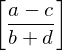

In [276]:
MC_sub = MC.subs(p,opt_p[0])

q_undertaxes = sm.solve(MC_sub,q)
q_undertaxes

which coincides with $q^*=q^f$ because of no uncertainty in the model.

Welfare under taxes is then:

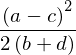

In [323]:
welfare_taxes = sm.integrate((a-b*q)-(c+d*q), (q, 0, q_undertaxes))
sm.simplify(welfare_taxes)

Welfare under allowances is then:

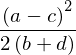

In [278]:
welfare_allowances = sm.integrate((a-b*q)-(c+d*q), (q, 0, opt_q))
sm.simplify(welfare_allowances)

$\Delta W = W_{taxes} - W_{allowances}$ is then:

In [279]:
sm.simplify(welfare_taxes - welfare_allowances)

Which means they yield the same end outcome, since quantities can be perfectly controlled under taxes aswell as allowances.

Numerically we have:

In [280]:
welfare_allowances_numerically = sm.integrate((a_par-b_par*q)-(c_par+d_par*q), (q, 0, sol_dict[q]))

def q_under_taxes_num(p):
    return ((p-c_par)/d_par)

q_tax = q_under_taxes_num(sol_dict[p])
q_tax

welfare_taxes_numerically = sm.integrate((a_par-b_par*q)-(c_par+d_par*q), (q, 0, q_tax))

print(f'Welfare under allowances={welfare_allowances_numerically:.2f}')
print(f'Welfare under taxes     ={welfare_taxes_numerically:.2f}')

Welfare under allowances=125.00
Welfare under taxes     =125.00


# P vs. Q with uncorrelated uncertainty

Consider the same setup above, but consider the wrinkle to the problem presented in Weitzman(1974), where we're unsure about the benefits and production costs of providing the environmental good *ex ante*:

The planner's problem is then to maximize:
$$ \max_q E[B(q,\eta)]-E[C(q,\theta)] $$
Which yields the first-order-condition:
$$ E[B'(q,\eta)]=E[C'(q,\theta)] $$
Where $p^*$ is the optimal price for the environmental good.

Consider a functional form with uncorrelated uncertainty:
* $B'(q,\eta) = a-b \cdot q + \eta $
* $C'(q,\theta) = c+d \cdot q + \theta $

Where we also assume:

* $E[\eta]=E[\theta]=0$,
* $E[\eta \theta]=0$,
* $E[\eta^2]=\sigma_\eta^2$ and
* $E[\theta^2]=\sigma_\theta^2$.

## Analytical analysis

In [308]:
eta = sm.symbols('eta')
theta = sm.symbols('theta')
qt = sm.symbols('q^t')


#First we set marginal cost and benefit equal under the assumption we know the shock (ex post):
equilibrium_post = sm.Eq(a-b*q+eta,c+d*q+theta)
equilibrium_post

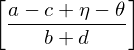

In [316]:
#Solve for q (ex post)
q_post = sm.solve(equilibrium_post,q)
q_post

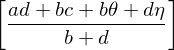

In [317]:
#Solve for P (ex post)
MC = sm.Eq(c+d*q+theta,p)
MC_subs = MC.subs(q,q_post[0])
p_post = sm.solve(MC_subs,p)
p_post

In [318]:
#Ex ante we don't know the shocks, so the best we can do is to solve:
equilibrium_pre = sm.Eq(a-b*q,c+d*q)
equilibrium_pre

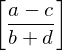

In [315]:
#Solve for q (ex ante), as in model without uncertainty.  
#I.e. the optimal amount produced under uncertainty ex ante
q_opt_pre = sm.solve(equilibrium_pre,q)
q_opt_pre

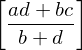

In [330]:
#Solve for p (ex ante)
MC = sm.Eq(c+d*q,p)
MC_subs = MC.subs(q,q_pre[0])
p_pre = sm.solve(MC_subs,p)
p_pre

Firms will produce up until the point where $p=C'(q,\theta)$ since they choose their production after they observe the shock, i.e:

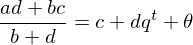

In [333]:
prod_problem = sm.Eq(p,c+d*qt+theta)
prod_prob_sub = prod_problem.subs(p,p_pre[0])
prod_prob_sub

Which yields the optimal quantity under taxes *ex ante* to be:

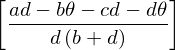

In [334]:
opt_pre_q = sm.solve(prod_prob_sub,qt)
sm.simplify(opt_pre_q)

We note that this is different from our *ex ante* solution for optimal $q$ under allowances:

$$ q^f = \frac{a-c}{b+d}$$ 

and optimal *ex post* solution:

# P vs. Q with correlated uncertainty

# Model simulation

# Conclusion of model variations